This is our notebook for visualizations over the entire dataset--no feature transformations/cleaning done.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from dateutil import parser

In [2]:
crime = pd.read_csv("data.csv")

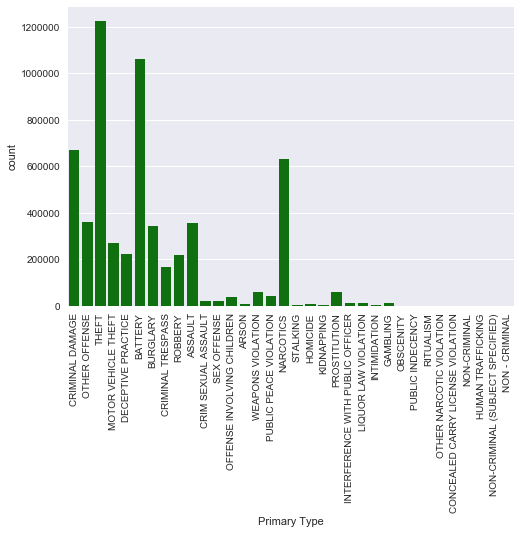

In [30]:
# Primary type counts
plt.xticks(rotation=90)
sns.countplot(x='Primary Type', data=crime, color='green')
plt.show()

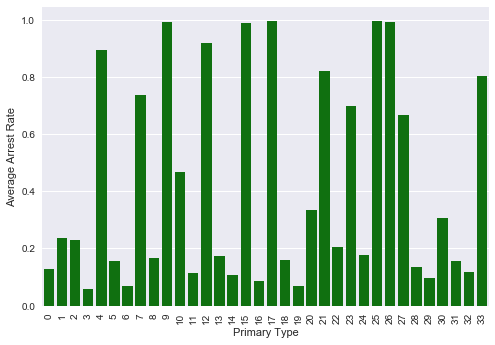

In [31]:
# Average arrest rate by primary type
arrest_rates = crime[['Primary Type', 'Arrest']].groupby('Primary Type', as_index=False).mean()
ax = sns.barplot(x='Primary Type', y='Arrest', data=arrest_rates, color='green')
ax.set_xticklabels(ax.get_xticks(), rotation=90)
ax.set_ylabel("Average Arrest Rate") 
plt.show()

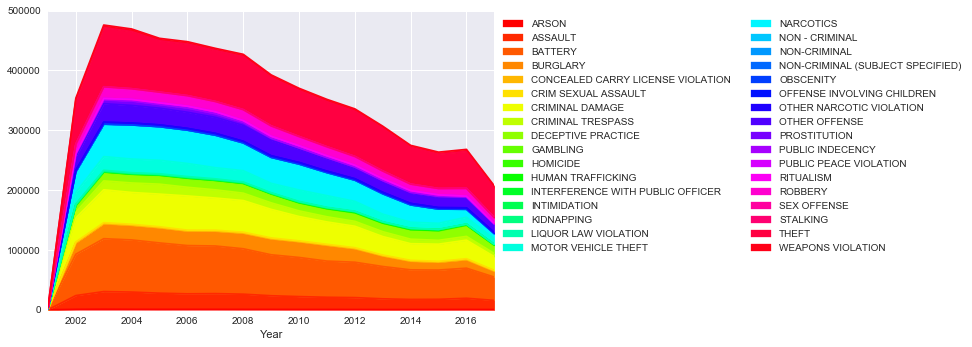

In [32]:
# Primary type over the years
years = crime.groupby(['Primary Type', 'Year'], as_index=False).size().unstack(level=0, fill_value=0)
years.plot.area(colormap='hsv')
plt.legend(bbox_to_anchor=(1, 1), loc='best', ncol=2)
plt.show()

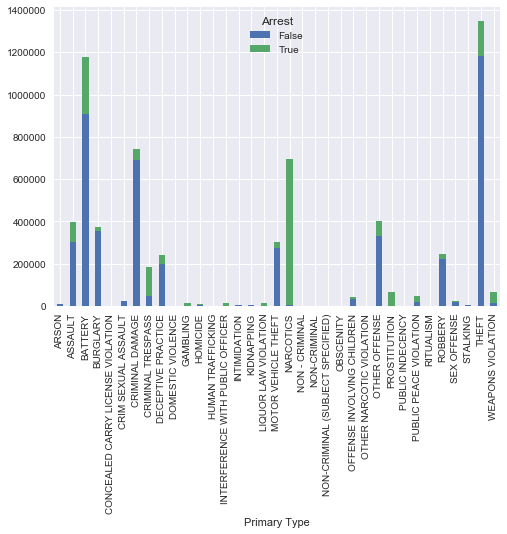

In [7]:
# Arrests per primary_type
primary_type_by_arrest = pd.pivot_table(crime, index="Primary Type", columns= "Arrest", aggfunc='size')
primary_type_by_arrest.plot.bar(stacked=True)
plt.show()

In [33]:
crime = crime[np.isfinite(crime["Ward"])] # drop N/A values
crime[['Ward']] = crime[['Ward']].astype(int) # convert "Ward" column to int

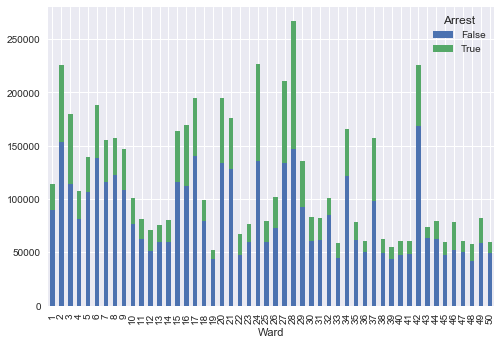

In [35]:
# Arrests per ward
ward_by_arrest = pd.pivot_table(crime, index="Ward", columns= "Arrest", aggfunc='size')
ward_by_arrest.plot.bar(stacked=True)
plt.show()

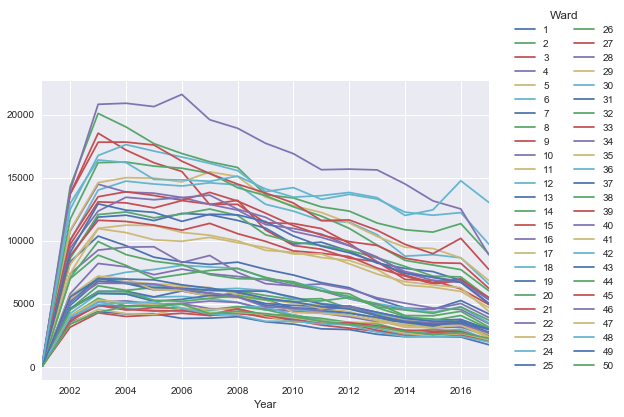

In [36]:
# Ward reports over time
wards_over_time = pd.pivot_table(crime, index="Year", columns="Ward", aggfunc='size')
wards_over_time.plot.line()
plt.legend(loc='lower right', bbox_to_anchor=(1.3, 0), ncol=2, title="Ward")
plt.show()

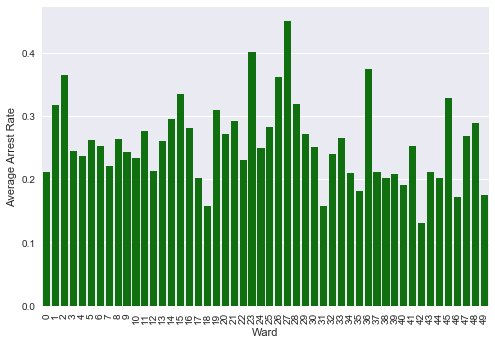

In [37]:
# Average arrest rate by ward
ward_arrest_rates = crime[["Ward", "Arrest"]].groupby("Ward", as_index=False).mean()
ax = sns.barplot(x="Ward", y="Arrest", data=ward_arrest_rates, color="green", )
ax.set_xticklabels(ax.get_xticks(), rotation=90)
ax.set_ylabel("Average Arrest Rate") 
plt.show()

In [38]:
crime = crime[np.isfinite(crime["District"])] # drop N/A values
crime[['District']] = crime[['District']].astype(int) # convert "District" column to int

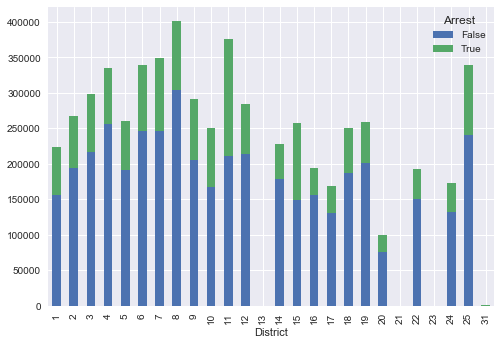

In [39]:
# Arrests per district
district_by_arrest = pd.pivot_table(crime, index="District", columns= "Arrest", aggfunc='size')
district_by_arrest.plot.bar(stacked=True)
plt.show()

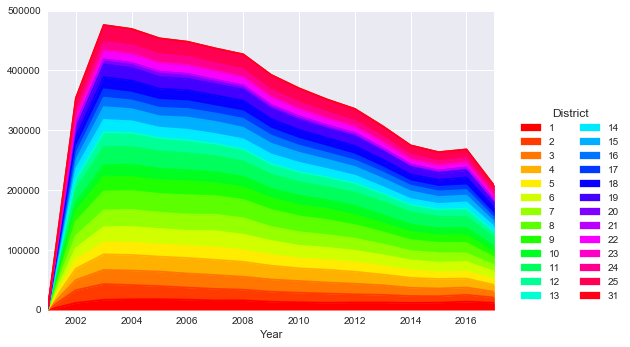

In [40]:
# District reports over time
districts_over_time = pd.pivot_table(crime, index="Year", columns="District", aggfunc='size')
districts_over_time.plot.area(colormap='hsv')
plt.legend(loc='lower right', bbox_to_anchor=(1.3, 0), ncol=2, title="District")
plt.show()

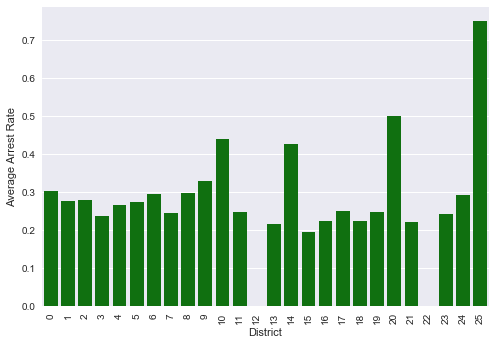

In [41]:
# Average arrest rate by district
district_arrest_rates = crime[["District", "Arrest"]].groupby("District", as_index=False).mean()
ax = sns.barplot(x="District", y="Arrest", data=district_arrest_rates, color="green", )
ax.set_xticklabels(ax.get_xticks(), rotation=90)
ax.set_ylabel("Average Arrest Rate") 
plt.show()

In [43]:
def convert_to_datetime(row) :
    dt = parser.parse(row["Date"])
    return dt
    
def label_day_of_week (row) :
    dt = row["Datetime"]
    return dt.weekday()

def label_day_of_month (row) :
    dt = row["Datetime"]
    return dt.day

def label_month(row) :
    dt = row["Datetime"]
    return dt.month

def label_year(row) :
    dt = row["Datetime"]
    return dt.year

def label_hour(row) : 
    dt = row["Datetime"]
    return dt.hour

In [44]:
crime["Datetime"] = crime.apply(lambda row : convert_to_datetime(row), axis = 1)
crime["Day of Week"] = crime.apply(lambda row : label_day_of_week(row), axis = 1)
crime["Day Of Month"] = crime.apply(lambda row : label_day_of_month(row), axis = 1)
crime["Month"] = crime.apply(lambda row : label_month(row), axis = 1)
crime["Hour"] = crime.apply(lambda row : label_hour(row), axis = 1)

The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.


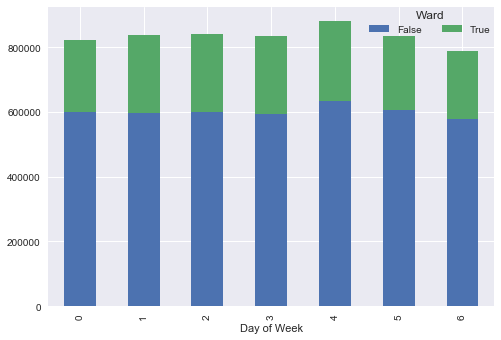

In [62]:
# Arrests by day of the week 
arrests_day_of_week = pd.pivot_table(crime, index="Day of Week", columns= "Arrest", aggfunc='size')
arrests_day_of_week.plot.bar(stacked=True)
plt.legend(loc='upper left', bbox_to_anchor=(0.7, 1.02), ncol=2, title="Ward")
plt.show()

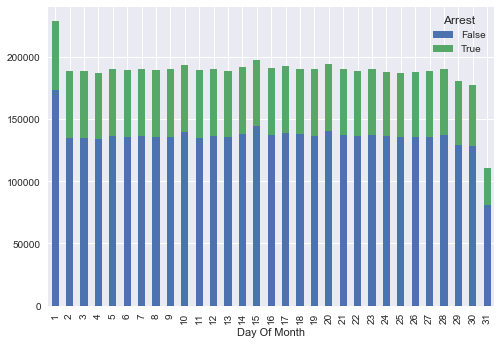

In [48]:
# Arrests by day of the month 
arrests_day_of_month = pd.pivot_table(crime, index="Day Of Month", columns= "Arrest", aggfunc='size')
arrests_day_of_month.plot.bar(stacked=True)
plt.show()

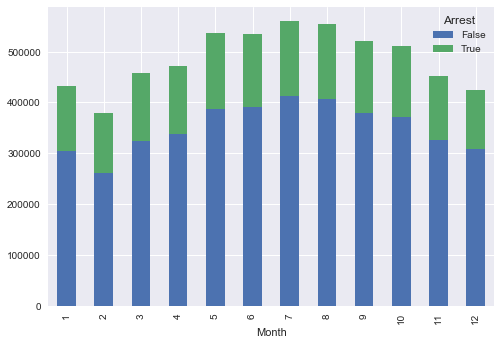

In [49]:
# Arrests by month
arrests_month = pd.pivot_table(crime, index="Month", columns= "Arrest", aggfunc='size')
arrests_month.plot.bar(stacked=True)
plt.show()

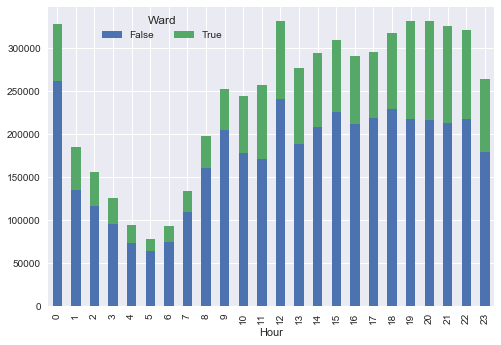

In [55]:
# Arrests by hour
arrests_hour = pd.pivot_table(crime, index="Hour", columns= "Arrest", aggfunc='size')
arrests_hour.plot.bar(stacked=True)
plt.legend(loc='upper left', bbox_to_anchor=(.1, 1), ncol=2, title="Ward")
plt.show()